In [96]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from annotation_utils import get_synset_first
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [2]:
refdf = pd.read_json("../data/refcoco_refdf.json.gz",compression='gzip', orient='split')

In [3]:
with open("../data/refcoco_refexp.txt.json", 'r') as f:
    reftxt = json.load(f)
parsedf = pd.DataFrame(reftxt["sentences"])

In [4]:
parsedf.head()

,basicDependencies,enhancedDependencies,enhancedPlusPlusDependencies,index,line,parse,tokens
0,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",0,1,(ROOT\n (NP\n (NP (DT the) (NN lady))\n ...,"[{'index': 1, 'word': 'the', 'originalText': '..."
1,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",1,2,(ROOT\n (FRAG\n (NP (NN lady))\n (PP (I...,"[{'index': 1, 'word': 'lady', 'originalText': ..."
2,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",2,3,(ROOT\n (NP (JJ blue) (NN shirt))),"[{'index': 1, 'word': 'blue', 'originalText': ..."
3,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",3,4,(ROOT\n (FRAG\n (NP (NN woman))\n (PP (...,"[{'index': 1, 'word': 'woman', 'originalText':..."
4,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",4,5,(ROOT\n (NP\n (NP (NN woman))\n (NP (JJ...,"[{'index': 1, 'word': 'woman', 'originalText':..."


In [9]:
np.all(parsedf.basicDependencies.apply(lambda x:x[0]['dep'] == 'ROOT'))

True

In [11]:
heads = parsedf.basicDependencies.apply(lambda x:x[0]['dependentGloss'])

In [67]:
heads_wn = [get_synset_first(h).name() if get_synset_first(h) else h  for h in heads]

In [68]:
refdf['dephead'] = heads

In [69]:
refdf['dephead_wn'] = heads_wn

In [71]:
refdf.head()

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged,dephead,dephead_wn
0,1,581857,1719310,refcoco,0,the lady with the blue shirt,"[[the, DT], [lady, NN], [with, IN], [the, DT],...",lady,lady.n.01
1,1,581857,1719310,refcoco,1,lady with back to us,"[[lady, NN], [with, IN], [back, NN], [to, TO],...",lady,lady.n.01
2,1,581857,1719310,refcoco,2,blue shirt,"[[blue, JJ], [shirt, NN]]",shirt,shirt.n.01
3,1,581857,463958,refcoco,3,woman in gray shirt facing camera on right,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN...",woman,woman.n.01
4,1,581857,463958,refcoco,4,woman gray right,"[[woman, NN], [gray, NN], [right, NN]]",woman,woman.n.01


In [74]:
region2names = defaultdict(list)

In [75]:
for region_id,head_wn in zip(list(refdf['region_id']),list(refdf['dephead_wn'])):
    region2names[region_id].append(head_wn)

In [76]:
region2names[1719310]

['lady.n.01', 'lady.n.01', 'shirt.n.01']

In [77]:
with open("/Volumes/data/Corpora/External/ImageCorpora/MSCOCO/annotations/instances_val2014.json", 'r') as f:
    coco_cats = json.load(f)['categories']

In [78]:
cat2wn = {}
for c in coco_cats:
    syn = get_synset_first(c['name'])
    if not syn:
        syn = "RAW:"+c['name']
    else:
        syn = syn.name()
    cat2wn[c['id']] = syn 

In [79]:
cat2wn

{1: 'person.n.01',
 2: 'bicycle.n.01',
 3: 'car.n.01',
 4: 'motorcycle.n.01',
 5: 'airplane.n.01',
 6: 'bus.n.01',
 7: 'train.n.01',
 8: 'truck.n.01',
 9: 'boat.n.01',
 10: 'RAW:traffic light',
 11: 'RAW:fire hydrant',
 13: 'RAW:stop sign',
 14: 'RAW:parking meter',
 15: 'bench.n.01',
 16: 'bird.n.01',
 17: 'cat.n.01',
 18: 'dog.n.01',
 19: 'horse.n.01',
 20: 'sheep.n.01',
 21: 'cow.n.01',
 22: 'elephant.n.01',
 23: 'bear.n.01',
 24: 'zebra.n.01',
 25: 'giraffe.n.01',
 27: 'backpack.n.01',
 28: 'umbrella.n.01',
 31: 'bag.n.04',
 32: 'necktie.n.01',
 33: 'bag.n.06',
 34: 'frisbee.n.01',
 35: 'ski.n.01',
 36: 'snowboard.n.01',
 37: 'RAW:sports ball',
 38: 'kite.n.01',
 39: 'RAW:baseball bat',
 40: 'RAW:baseball glove',
 41: 'skateboard.n.01',
 42: 'surfboard.n.01',
 43: 'RAW:tennis racket',
 44: 'bottle.n.01',
 46: 'RAW:wine glass',
 47: 'cup.n.01',
 48: 'fork.n.01',
 49: 'knife.n.01',
 50: 'spoon.n.01',
 51: 'bowl.n.01',
 52: 'banana.n.01',
 53: 'apple.n.01',
 54: 'sandwich.n.01',
 55: 

In [80]:
bbdf = pd.read_json("../data/mscoco_bbdf.json.gz",compression='gzip', orient='split')

In [81]:
bbdf.head()

,i_corpus,image_id,region_id,bb,cat
0,1,480023,86,"[116.95, 305.86, 285.3, 266.03]",58
1,1,480023,438029,"[75.23, 134.7, 203.17, 215.63]",1
2,1,480023,460329,"[239.33, 176.98, 110.56, 133.66]",1
3,1,480023,498741,"[394.95, 222.7, 85.05, 197.48]",1
4,1,480023,1200708,"[0.0, 0.18, 78.96, 164.01]",1


In [82]:
images = set(bbdf.image_id)

In [83]:
image2region = {}
image2cats = {}
for im in images:
    image2region[im] = list(bbdf[bbdf['image_id'] == im].region_id)
    image2cats[im] = list(bbdf[bbdf['image_id'] == im].cat)

In [84]:
region2image = {reg:im for im in image2region for reg in image2region[im]}

In [85]:
region_dict = []
for reg in region2names:
    distr = image2region[region2image[reg]]
    target_index = distr.index(reg)
    distr = distr[:target_index]+distr[target_index+1:]
    cats = image2cats[region2image[reg]]
    target_cat = cat2wn[cats[target_index]]
    distr_cats = cats[:target_index]+cats[target_index+1:]
    distr_cats = [cat2wn[c] for c in distr_cats]
    d = {'region_id':reg,
          'image_id':region2image[reg],
         'names':region2names[reg],
         'distractor_ids':distr,
         'region_cat':target_cat,
         'distractor_cats':distr_cats
        }
    region_dict.append(d)

In [86]:
len(region_dict)

50000

In [88]:
regiondf = pd.DataFrame(region_dict)


In [89]:
regiondf.to_json("../data/refcoco_regions_distractors.json.gz", compression='gzip', orient='split')


In [91]:
regiondf.head()




,distractor_cats,distractor_ids,image_id,names,region_cat,region_id
0,"[person.n.01, person.n.01, person.n.01, orange...","[463958, 467023, 470153, 1050612, 1050827, 105...",581857,"[lady.n.01, lady.n.01, shirt.n.01]",person.n.01,1719310
1,"[person.n.01, person.n.01, orange.n.01, orange...","[467023, 470153, 1050612, 1050827, 1051359, 15...",581857,"[woman.n.01, woman.n.01, woman.n.01]",person.n.01,463958
2,"[person.n.01, person.n.01, RAW:tennis racket, ...","[469544, 485695, 657039, 657322]",581839,"[person.n.01, standing.n.01, center.n.01]",person.n.01,495152
3,"[person.n.01, person.n.01, RAW:tennis racket, ...","[469544, 495152, 657039, 657322]",581839,"[lady.n.01, girl.n.01, woman.n.01]",person.n.01,485695
4,"[person.n.01, bag.n.06]","[440706, 1842091]",581789,"[woman.n.01, left.n.01, woman.n.01]",person.n.01,453177


In [94]:
regiondf['ndistractors'] = regiondf.distractor_cats.apply(lambda x: len(x))

In [107]:
distances = []
for ix,row in regiondf.iterrows():
    lch = []
    if len(row['region_cat'].split('.')) == 3:
        rsyn = wn.synset(row['region_cat'])
        
        for c in row.distractor_cats:
            if not c.startswith('RAW'):
                dsyn = wn.synset(c)
                lch.append(wn.path_similarity(rsyn,dsyn))
                #print(rsyn,dsyn,wn.path_similarity(rsyn,dsyn))
                
    #if ix > 10:
    #    break
                
    distances.append(lch)

#### Average number of distractors: 

In [108]:
np.mean(regiondf.ndistractors)

9.60916

In [109]:
regiondf['distances'] = distances

In [110]:
regiondf.head()

,distractor_cats,distractor_ids,image_id,names,region_cat,region_id,ndistractors,distances
0,"[person.n.01, person.n.01, person.n.01, orange...","[463958, 467023, 470153, 1050612, 1050827, 105...",581857,"[lady.n.01, lady.n.01, shirt.n.01]",person.n.01,1719310,32,"[1.0, 1.0, 1.0, 0.1, 0.1, 0.1, 0.1666666666666..."
1,"[person.n.01, person.n.01, orange.n.01, orange...","[467023, 470153, 1050612, 1050827, 1051359, 15...",581857,"[woman.n.01, woman.n.01, woman.n.01]",person.n.01,463958,32,"[1.0, 1.0, 0.1, 0.1, 0.1, 0.16666666666666666,..."
2,"[person.n.01, person.n.01, RAW:tennis racket, ...","[469544, 485695, 657039, 657322]",581839,"[person.n.01, standing.n.01, center.n.01]",person.n.01,495152,4,"[1.0, 1.0]"
3,"[person.n.01, person.n.01, RAW:tennis racket, ...","[469544, 495152, 657039, 657322]",581839,"[lady.n.01, girl.n.01, woman.n.01]",person.n.01,485695,4,"[1.0, 1.0]"
4,"[person.n.01, bag.n.06]","[440706, 1842091]",581789,"[woman.n.01, left.n.01, woman.n.01]",person.n.01,453177,2,"[1.0, 0.1]"


In [118]:
flatdistances = [d for dlist in regiondf.distances.tolist() for d in dlist]

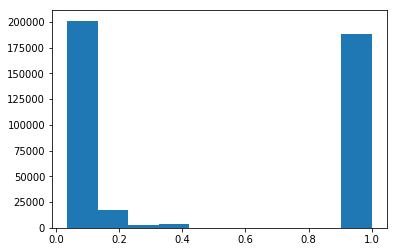

In [121]:
plt.hist(flatdistances)
plt.savefig("distance_region_distractors.png")

In [120]:
plt.savefig("distance_region_distractors.png")

In [122]:
name_distances = []
for ix,row in regiondf.iterrows():
    lch = []
    region_names = row['names']
    region_syns = [wn.synset(rn) for rn in region_names if len(rn.split('.')) == 3]
    if len(region_syns) > 0:
        for did in row.distractor_ids:
            distdf = regiondf[regiondf.region_id == did]
            
            if len(distdf) > 0:
                dnames = distdf.iloc[0]['names']
                dist_syns = [wn.synset(rn) for rn in dnames if len(rn.split('.')) == 3]
                for rsyn in region_syns:
                    for dsyn in dist_syns:
                        name_distances.append(wn.path_similarity(rsyn,dsyn))
                

In [124]:
name_distances[:50]

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.5,
 0.5,
 0.09090909090909091,
 0.5,
 0.5,
 0.09090909090909091,
 0.5,
 0.5,
 0.09090909090909091,
 0.25,
 0.25,
 0.3333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.1,
 0.25,
 0.08333333333333333,
 0.09090909090909091,
 0.25,
 0.08333333333333333,
 0.09090909090909091,
 0.3333333333333333,
 0.09090909090909091,
 0.1,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.1,
 0.1,
 0.1,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.1,
 0.3333333333333333,
 0.3333333333333333,
 0.1]

In [125]:
name_distances = [n for n in name_distances if isinstance(n,float)]

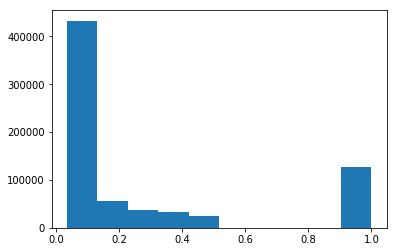

In [126]:
plt.hist(name_distances)
plt.savefig("name_distance_region_distractors.png")